In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Define the column names
column_names = [
    "version_nb", "search_id", "search_country",
    "search_date", "search_time", "origin_city", "destination_city", "request_dep_date",
    "request_return_date", "passengers_string",
    "currency", "price", "taxes", "fees", "nb_of_flights"
]

In [4]:
# Read the CSV file
# Adjust the path to your CSV file
df = pd.read_csv('drive/MyDrive/raw-data.csv', sep='^', header=None, usecols=range(15))
df.columns = column_names

# Describe the columns
print(df.describe(include='all'))

        version_nb                             search_id search_country  \
count    9724383.0                               9724383        9724383   
unique         NaN                                208074            104   
top            NaN  c288f3fc-80ed-4530-83c9-a1a58f7e5f93             FR   
freq           NaN                                   623        4563967   
mean           1.0                                   NaN            NaN   
std            0.0                                   NaN            NaN   
min            1.0                                   NaN            NaN   
25%            1.0                                   NaN            NaN   
50%            1.0                                   NaN            NaN   
75%            1.0                                   NaN            NaN   
max            1.0                                   NaN            NaN   

       search_date search_time origin_city destination_city request_dep_date  \
count      9724383 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Visualize the distribution of the "search_time" column
# Assuming "search_time" is in format HH:MM:SS, you might first want to convert it to a more
# numerical format that represents the time of day in minutes or hours for easier visualization

# Convert "search_time" to datetime to extract hours for the visualization
df['search_time'] = pd.to_datetime(df['search_time'], format='%H:%M:%S').dt.time

# Extract hour from "search_time" and create a new column
df['search_hour'] = df['search_time'].apply(lambda x: x.hour + x.minute / 60)

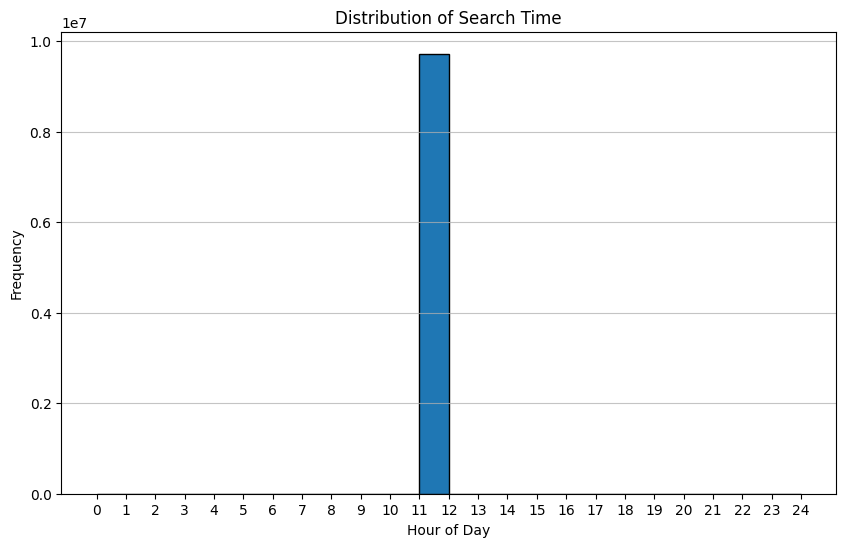

In [6]:
# Using Matplotlib to create a histogram
plt.figure(figsize=(10, 6))
plt.hist(df['search_hour'], bins=24, range=(0,24), edgecolor='black')
plt.title('Distribution of Search Time')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.xticks(range(0, 25, 1))
plt.grid(axis='y', alpha=0.75)
plt.show()

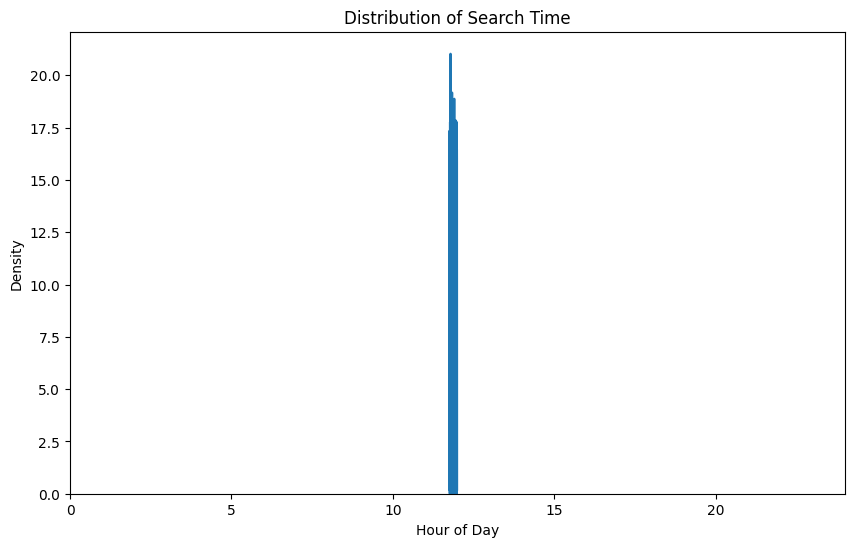

In [7]:

# Alternatively, using Seaborn for a smoother distribution curve (kdeplot)
plt.figure(figsize=(10, 6))
sns.kdeplot(df['search_hour'], bw_adjust=0.5)
plt.title('Distribution of Search Time')
plt.xlabel('Hour of Day')
plt.xlim(0, 24)
plt.show()

In [11]:
df['search_time'].min()

datetime.time(11, 45)

In [12]:
df['search_time'].max()

datetime.time(11, 59, 59)